In [39]:
import pandas as pd  # Importing pandas library for data manipulation and analysis
import numpy as np   # Importing numpy library for numerical operations
import matplotlib.pyplot as plt  # Importing matplotlib for data visualization
import seaborn as sns    # Importing seaborn for statistical data visualization
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Importing metrics for model evaluation
from sklearn.model_selection import train_test_split   # Importing train_test_split for splitting data into train and test sets
from sklearn.preprocessing import StandardScaler   # Importing StandardScaler for feature scaling
from sklearn.preprocessing import OneHotEncoder    # Importing OneHotEncoder for encoding categorical variables
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression model from scikit-learn


In [40]:
# Reading the CSV file 'diabetes2.csv' into a pandas DataFrame
diabetes_df = pd.read_csv('diabetes2.csv')

In [41]:
# Displaying information about the DataFrame including the data types and number of non-null values for each column
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [42]:
# Generating descriptive statistics of the DataFrame such as count, mean, standard deviation, minimum, maximum, and quartile values
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Changing the values with min value as Zero to the mean values of the features. As in real life it cannot be zero. Eg: Blood pressure, Glucose,Skin Thickness,Insulin,BMI

In [43]:
# Replacing zero values in specific columns with the mean of non-zero values in those columns
diabetes_df['Glucose'] = diabetes_df['Glucose'].replace(0, diabetes_df['Glucose'].mean())
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].replace(0, diabetes_df['BloodPressure'].mean())
diabetes_df['BMI'] = diabetes_df['BMI'].replace(0, diabetes_df['BMI'].mean())
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].replace(0, diabetes_df['SkinThickness'].mean())
diabetes_df['Insulin'] = diabetes_df['Insulin'].replace(0, diabetes_df['Insulin'].mean())

In [44]:
# Displaying descriptive statistics of the DataFrame after replacing zero values with mean values in specific columns
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
# Checking the class distribution of the target variable 'Outcome'
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

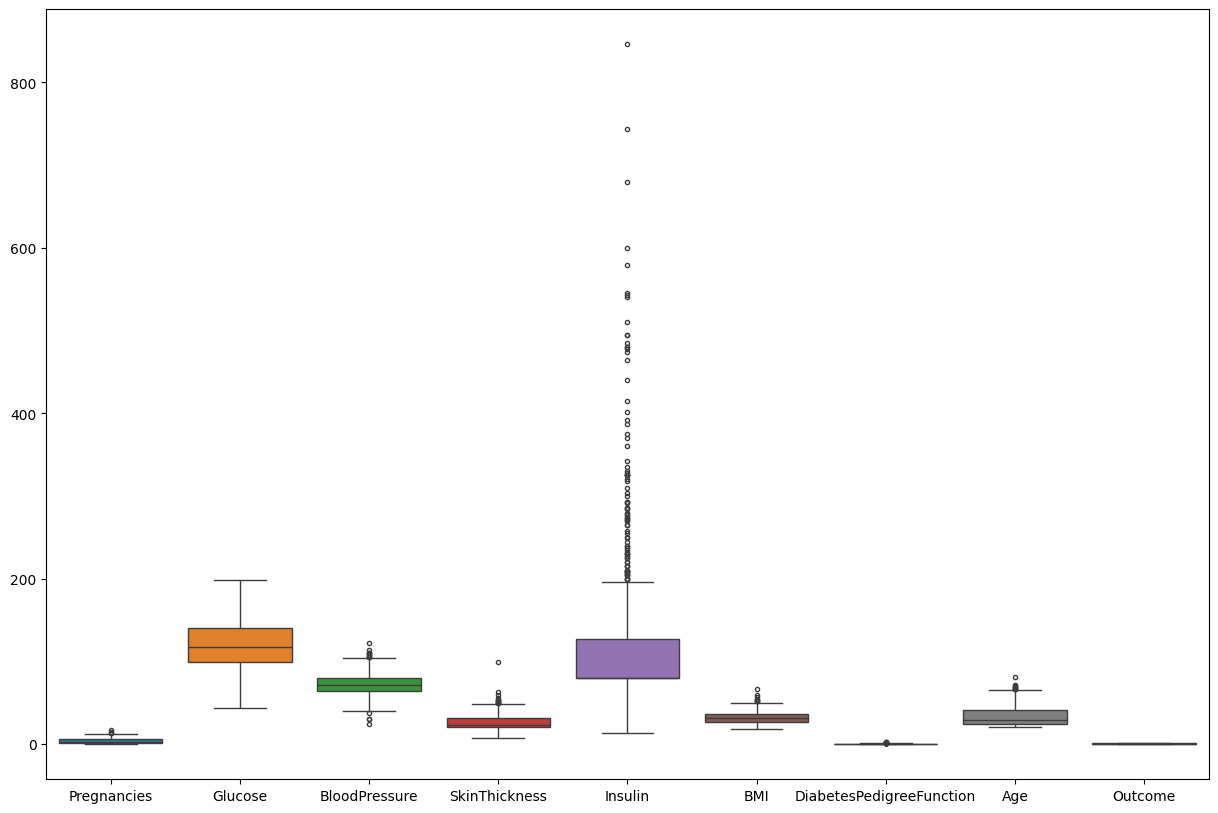

In [46]:
# Visualizing the presence of outliers using a boxplot for each numerical feature in the diabetes DataFrame
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=diabetes_df, ax=ax, fliersize=3)

In [47]:
# Separating the independent (features) and dependent (target) variables
X = diabetes_df.drop(columns=['Outcome'])  # Independent variables
y = diabetes_df['Outcome']  # Dependent variable

In [48]:
# Handling class imbalance using SMOTE oversampling
from imblearn.over_sampling import SMOTE

In [49]:
# Instantiating SMOTE with a specific random state for reproducibility
smote = SMOTE(random_state=42)

In [50]:
# Displaying the shape of the feature matrix (X) and the target vector (y) before oversampling
X.shape, y.shape

((768, 8), (768,))

In [51]:
# Applying SMOTE oversampling to balance the classes
X_sm, y_sm = smote.fit_resample(X, y)

In [52]:
# Displaying the shape after applying SMOTE oversampling
X_sm.shape, y_sm.shape

((1000, 8), (1000,))

In [53]:
# Displaying the class distribution after applying SMOTE oversampling
y_sm.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [54]:
# Splitting the dataset into training and testing sets with a test size of 20%
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [55]:
# Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [56]:
# Initializing and fitting a logistic regression model
from sklearn.linear_model import LogisticRegression

diabetes_log = LogisticRegression()
diabetes_log.fit(X_train_Scaled, Y_train)


LogisticRegression()

In [57]:
# Predicting probabilities of class labels for test data
diabetes_log.predict_proba(X_test_Scaled)

array([[0.64412897, 0.35587103],
       [0.85517504, 0.14482496],
       [0.11928351, 0.88071649],
       [0.14097156, 0.85902844],
       [0.73411635, 0.26588365],
       [0.49248323, 0.50751677],
       [0.83706664, 0.16293336],
       [0.894608  , 0.105392  ],
       [0.10275165, 0.89724835],
       [0.84016833, 0.15983167],
       [0.22008123, 0.77991877],
       [0.90915609, 0.09084391],
       [0.76514268, 0.23485732],
       [0.12916919, 0.87083081],
       [0.02697472, 0.97302528],
       [0.14766316, 0.85233684],
       [0.2989216 , 0.7010784 ],
       [0.18751103, 0.81248897],
       [0.01941138, 0.98058862],
       [0.08440003, 0.91559997],
       [0.11814269, 0.88185731],
       [0.92572739, 0.07427261],
       [0.40684254, 0.59315746],
       [0.84466048, 0.15533952],
       [0.9356819 , 0.0643181 ],
       [0.04251447, 0.95748553],
       [0.52522206, 0.47477794],
       [0.57671443, 0.42328557],
       [0.05646828, 0.94353172],
       [0.1547645 , 0.8452355 ],
       [0.

In [58]:
# Predicting class labels for test data
y_pred_diabetes_log = diabetes_log.predict(X_test_Scaled)

Accuracy Score: 0.765
Precision Score: 0.7547169811320755
Recall Score: 0.7920792079207921
F1 Score: 0.7729468599033816
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76        99
           1       0.75      0.79      0.77       101

    accuracy                           0.77       200
   macro avg       0.77      0.76      0.76       200
weighted avg       0.77      0.77      0.76       200

Confusion Matrix:
 [[73 26]
 [21 80]]
ROC AUC Score: 0.7647264726472648


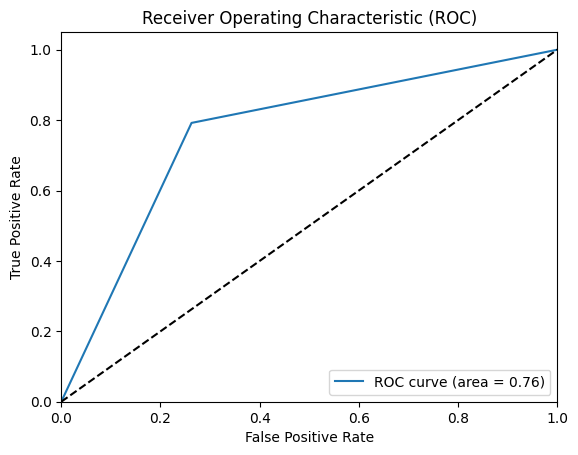

In [59]:
# Evaluating model using metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Accuracy
print("Accuracy Score:", accuracy_score(Y_test, y_pred_diabetes_log))

# Precision
print("Precision Score:", precision_score(Y_test, y_pred_diabetes_log))

# Recall
print("Recall Score:", recall_score(Y_test, y_pred_diabetes_log))

# F1 Score
print("F1 Score:", f1_score(Y_test, y_pred_diabetes_log))

# Classification Report
print("Classification Report:\n", classification_report(Y_test, y_pred_diabetes_log))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_diabetes_log))

# Calculate ROC AUC
roc_auc = roc_auc_score(Y_test, y_pred_diabetes_log)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_diabetes_log)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [60]:
# Extracting coefficients and feature names
coefficients = diabetes_log.coef_[0]
intercept = diabetes_log.intercept_[0]

# Printing the intercept
print("Intercept:", intercept)

# Printing the coefficient for each feature
for feature, coefficient in zip(X_train.columns, coefficients):
    print(f"{feature}: {coefficient}")

# Interpretation
print("\nInterpretation:")
for feature, coefficient in zip(X_train.columns, coefficients):
    if coefficient > 0:
        print(f"An increase in {feature} is associated with an increase in the likelihood of diabetes.")
    elif coefficient < 0:
        print(f"An increase in {feature} is associated with a decrease in the likelihood of diabetes.")
    else:
        print(f"The feature {feature} does not have a significant impact on the likelihood of diabetes.")


Intercept: 0.05642830223093782
Pregnancies: 0.41533996427499553
Glucose: 1.328186694868273
BloodPressure: -0.21618200227625325
SkinThickness: -0.00897292107561278
Insulin: -0.24920000268427092
BMI: 0.6878637391866333
DiabetesPedigreeFunction: 0.32166979721661815
Age: 0.19131573834927496

Interpretation:
An increase in Pregnancies is associated with an increase in the likelihood of diabetes.
An increase in Glucose is associated with an increase in the likelihood of diabetes.
An increase in BloodPressure is associated with a decrease in the likelihood of diabetes.
An increase in SkinThickness is associated with a decrease in the likelihood of diabetes.
An increase in Insulin is associated with a decrease in the likelihood of diabetes.
An increase in BMI is associated with an increase in the likelihood of diabetes.
An increase in DiabetesPedigreeFunction is associated with an increase in the likelihood of diabetes.
An increase in Age is associated with an increase in the likelihood of dia